In [9]:
import numpy as np
import matplotlib.pyplot as plt


La valeur du coefficient de transmission pour 2.0 polarisateurs effectuant une rotation de 90° est de 3.749399456654644e-33
La valeur du coefficient de transmission pour 3.0 polarisateurs effectuant une rotation de 90° est de 0.25000000000000006
La valeur du coefficient de transmission pour 4.0 polarisateurs effectuant une rotation de 90° est de 0.42187500000000017
La valeur du coefficient de transmission pour 5.0 polarisateurs effectuant une rotation de 90° est de 0.5307900429449552
La valeur du coefficient de transmission pour 6.0 polarisateurs effectuant une rotation de 90° est de 0.6054290497131063
La valeur du coefficient de transmission pour 7.0 polarisateurs effectuant une rotation de 90° est de 0.6596678783944642
La valeur du coefficient de transmission pour 8.0 polarisateurs effectuant une rotation de 90° est de 0.700833836968084
La valeur du coefficient de transmission pour 9.0 polarisateurs effectuant une rotation de 90° est de 0.733133440547323
La valeur du coefficient de t

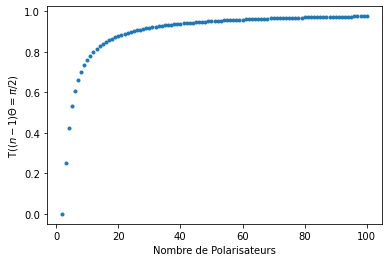

In [19]:
# Calcul de l'amplitude du vecteur de Jones pour 1 polariseur dépendant de theta
def jones1Pol(theta):

    M2 = np.array([[(np.cos(theta))**2,np.sin(theta)*np.cos(theta) ],[np.sin(theta)*np.cos(theta),(np.sin(theta))**2 ]])
    M3 = np.array([[(np.cos(2*theta))**2,np.sin(2*theta)*np.cos(2*theta) ],[np.sin(2*theta)*np.cos(2*theta),(np.sin(2*theta))**2 ]])
    J_ini = np.array([1, 0])

    M_tot = M2
    J_fin = M_tot.dot(J_ini)

    return np.linalg.norm(J_fin)**2

# Calcul de l'amplitude du vecteur de Jones pour 2 polariseur dépendant de theta
def jones2Pol(theta):

    M2 = np.array([[(np.cos(theta))**2,np.sin(theta)*np.cos(theta) ],[np.sin(theta)*np.cos(theta),(np.sin(theta))**2 ]])
    M3 = np.array([[(np.cos(2*theta))**2,np.sin(2*theta)*np.cos(2*theta) ],[np.sin(2*theta)*np.cos(2*theta),(np.sin(2*theta))**2 ]])
    J_ini = np.array([1, 0])

    M_tot = M3@M2
    J_fin = M_tot.dot(J_ini)

    return np.linalg.norm(J_fin)**2

def jones3Pol(theta):

    M2 = np.array([[(np.cos(theta))**2,np.sin(theta)*np.cos(theta) ],[np.sin(theta)*np.cos(theta),(np.sin(theta))**2 ]])
    M3 = np.array([[(np.cos(2*theta))**2,np.sin(2*theta)*np.cos(2*theta) ],[np.sin(2*theta)*np.cos(2*theta),(np.sin(2*theta))**2 ]])
    M4 = np.array([[(np.cos(3*theta))**2,np.sin(3*theta)*np.cos(3*theta) ],[np.sin(3*theta)*np.cos(3*theta),(np.sin(3*theta))**2 ]])
    J_ini = np.array([1, 0])

    M_tot = M4@M3@M2
    J_fin = M_tot.dot(J_ini)

    return np.linalg.norm(J_fin)**2

# Définition des vecteur pour les graphs
epsilon = 0.05
thetaPoints = np.linspace(0, np.pi/2, 50)
thetaPoints2 = np.linspace(0+epsilon, np.pi/2+epsilon, 50)
power1Coeff = []
power2Coeff = []
power3Coeff = []
cos2 = (np.cos(thetaPoints2))**2
cos4 = (np.cos(thetaPoints2))**4
cos6 = (np.cos(thetaPoints2))**6
cos8 = (np.cos(thetaPoints2))**8
cos10= (np.cos(thetaPoints2))**10
cos20= (np.cos(thetaPoints2))**20
cos100=(np.cos(thetaPoints2))**100
a_list=[]
n_list=[]
for power in range(2,200,2):
    n=power/2+1
    print(f"La valeur du coefficient de transmission pour {n} polarisateurs effectuant une rotation de 90° est de {(np.cos(np.pi/2/(n-1)))**power}")
    n_list.append(n)
    a_list.append((np.cos(np.pi/2/(n-1)))**power)

plt.plot(n_list,a_list,".")
plt.xlabel("Nombre de Polarisateurs")
plt.ylabel(f'T($(n-1)\Theta=\pi/2$)')
# Pas opti, mais ca marche
for theta in thetaPoints : 
    power1Coeff.append(jones1Pol(theta))
    power2Coeff.append(jones2Pol(theta))
    power3Coeff.append(jones3Pol(theta))

# theta_2pol=[np.pi/2,np.pi/2]
# theta_3pol=[np.pi/2/2,np.pi/2/2]
# theta_4pol=[np.pi/2/3,np.pi/2/3]
# liste01=[0,1]
# Graphiques Jones (à modifier pour les cas classiques)
# plt.figure()
# plt.plot(thetaPoints, power1Coeff, '.', label='Formalisme de Jones')
# plt.plot(thetaPoints2, cos2,'.',  label='Formalisme classique')
# plt.xlabel(f'$\Theta (rad)$')
# plt.ylabel(f'T($\Theta$)')
# plt.legend(prop={'size': 14})
# plt.savefig('2pol.png')

# plt.figure()
# plt.plot(thetaPoints, power2Coeff, '.', label='Formalisme de Jones')
# plt.plot(thetaPoints2, cos4,'.',  label='Formalisme classique')
# plt.xlabel(f'$\Theta (rad)$')
# plt.ylabel(f'T($\Theta$)')
# plt.legend(prop={'size': 14})
# plt.savefig('3pol.png')

# plt.figure()
# plt.plot(thetaPoints, power1Coeff, '.', label='+ 1 pol')
# plt.plot(thetaPoints, power2Coeff, '.', label='+ 2 pol')
# plt.plot(thetaPoints, power3Coeff, '.', label='+ 3 pol')
# plt.plot(theta_2pol, liste01,  label='90° turn for 2 pol')
# plt.plot(theta_3pol, liste01,  label='90° turn for 3 pol')
# plt.plot(theta_4pol, liste01, label='90° turn for 4 pol')
# # plt.plot(thetaPoints2, cos2,'.',  label='+ 1 pol')
# # plt.plot(thetaPoints2, cos4,'.',  label='+ 2 pol')
# plt.plot(thetaPoints2, cos6,'.',  label='+ 3 pol')
# # plt.plot(thetaPoints2, cos8,'.',  label='+ 4 pol')
# # plt.plot(thetaPoints2, cos10,'.',  label='+ 5 pol')
# # plt.plot(thetaPoints2, cos20,'.',  label='+ 10 pol')
# # plt.plot(thetaPoints2, cos100,'.',  label='+ 50 pol')
# plt.xlabel(f'$\Theta (rad)$')
# plt.ylabel(f'T($\Theta$)')
# plt.legend()
